In [5]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
matplotlib.rcParams.update({"font.family":"serif"})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [48]:
#MODEL = "0110"

#MODEL = "0144"

MODEL = "coronary"

##0110 paths

#PATH  = "aorta"
#PATH  = "right_iliac"

## 0144 paths

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
#PATH = "SMA"

## coronary paths ##
#PATH = "lc1"
#PATH = "lc1_sub1"
#PATH = "lc1_sub2"
#PATH = "lc1_sub3"
#PATH = "lc2"
PATH = "lc2_sub1"

#CASE  = "sim_wom_rcr"
CASE = "sim_cor_inflow"

mesh  = "coarse"

gen   = 2

quants   = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"pressure $(mmHg)$",
    r"WSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

dt       = 0.004

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+"_edit.csv"
    
df = pd.read_csv(DIR)

df = df.loc[df['path']==PATH]

OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)+"/"+PATH
io.mkdir(OUTPUT)
OUTPUT = OUTPUT+'/'+mesh
io.mkdir(OUTPUT)

#df = pd.read_csv(CSV)
#df = df.loc[df['mesh']==mesh]
#df = df.loc[df['generation'] == gen]

df['pressure_0'] = df['pressure_0']

models   = df['model'].unique()

points = df['point'].unique()[-3:]
#points = [6,7]
print(points)
print(OUTPUT)

[54 55 56]
/media/marsdenlab/Data1/UQ/coronary/sim_cor_inflow/2/lc2_sub1/coarse


In [49]:
#df.loc[df['model']==1][['point','time','pressure_0']]
#df.loc[df['pressure_0']>140]
#df.loc[df['velocity_3']>60
#df.loc[(df['vWSS_3_boundary']>300) & (df['point']==6)]['model'].unique()
#df.loc[(df['pressure_0']>200) & (df['point']==9)]['model'].unique()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


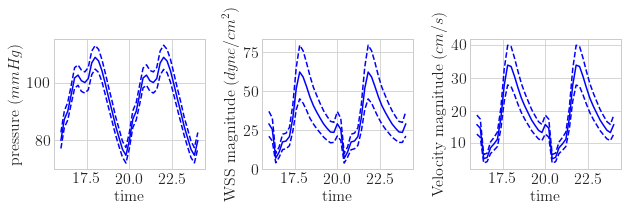

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


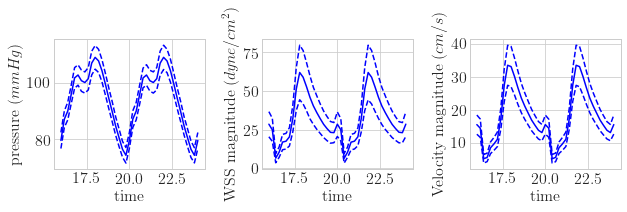

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


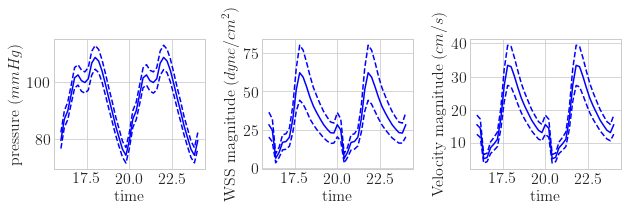

In [50]:
for po in points:
    Size  = 3
    count = 0
    Wplot = len(labels)
    f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
    
    for i,q in enumerate(quants):
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point']==po)]
            if data.shape[0] == 0: continue
            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)

        mu  = np.mean(Y,axis=0)
        std = np.std(Y,axis=0)*2

        label = labels[i]

    
        axarr[i].plot(x,mu, color='b')
        axarr[i].plot(x,mu+std, color='b',linestyle='--')
        axarr[i].plot(x,mu-std, color='b',linestyle='--')
        axarr[i].set_xlabel("time")
        axarr[i].set_ylabel(label)
        axarr[i].legend()

    plt.tight_layout()
    plt.savefig(OUTPUT+'/{}_conf.png'.format(po),dpi=300)
    plt.savefig(OUTPUT+'/{}_conf.pdf'.format(po),dpi=200)

    plt.show()
    plt.close()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


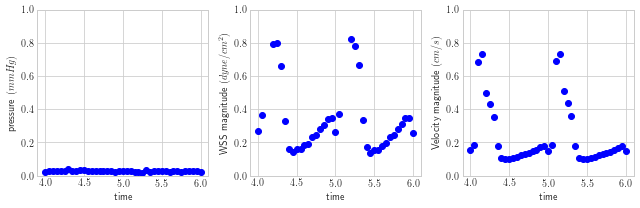

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


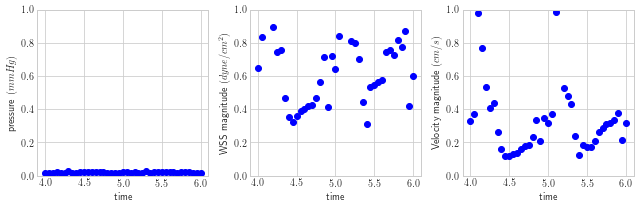

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


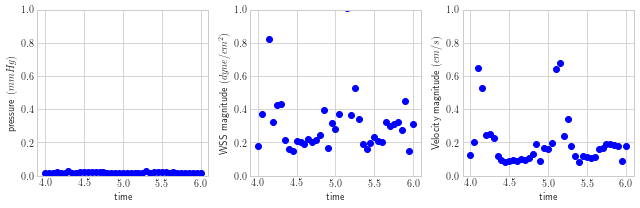

In [6]:
for po in points:
    Size  = 3
    count = 0
    Wplot = len(labels)
    f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
    for i,q in enumerate(quants):
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point'] == po)]
            if data.shape[0] == 0: continue
            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)

        mu  = np.mean(Y,axis=0)
        std = np.std(Y,axis=0)
        std_rel = std/mu
        
        label = labels[i]

    
        axarr[i].plot(x,std_rel, color='b',marker='o',linestyle='')
        axarr[i].set_xlabel("time")
        axarr[i].set_ylabel(label)
        axarr[i].set_ylim(0,1)
        axarr[i].legend()

    plt.tight_layout()
    plt.savefig(OUTPUT+'/{}_std.png'.format(po),dpi=300)
    plt.savefig(OUTPUT+'/{}_std.pdf'.format(po),dpi=200)

    plt.show()
    plt.close()

In [ ]:
for po in points:
    print(po)
    Size  = 3
    count = 0
    Wplot = len(labels)
    f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
    for i,q in enumerate(quants):
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point']==po)]

            if data.shape[0] == 0: continue

            y = data[q].values
            x = data['time'].values*dt
            
            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)
        
        label = labels[i]

    
        axarr[i].plot(X.T,Y.T, color='b')
        axarr[i].set_xlabel("time")
        axarr[i].set_ylabel(label)
        axarr[i].legend()

    plt.tight_layout()
    plt.savefig(OUTPUT+'/{}.png'.format(po),dpi=300)
    plt.savefig(OUTPUT+'/{}.pdf'.format(po),dpi=200)
    plt.show()
    plt.close()